## Importing basic libraries

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import radians, sin, cos, sqrt, atan2
from sklearn.model_selection import train_test_split

## Importing dataset

In [2]:
df = pd.read_csv('fraudTrain.csv')

In [3]:
df.tail()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
1296670,1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,...,37.7175,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0
1296671,1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,...,39.2667,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0
1296672,1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,...,32.9396,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0
1296673,1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,...,43.3526,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0
1296674,1296674,2020-06-21 12:13:37,4292902571056973207,"fraud_Langosh, Wintheiser and Hyatt",food_dining,4.30,Jeffrey,Smith,M,135 Joseph Mountains,...,45.8433,-113.8748,218,"Therapist, horticultural",1995-08-16,8f7c8e4ab7f25875d753b422917c98c9,1371816817,46.565983,-114.186110,0


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

## Analyzing labels in the datasets

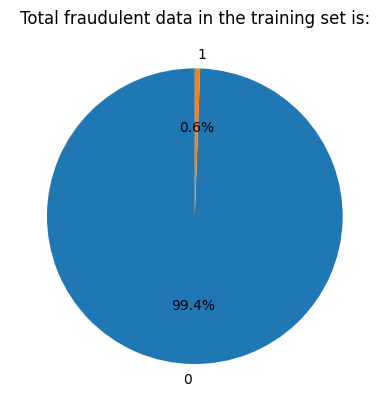

is_fraud
0    1289169
1       7506
Name: count, dtype: int64


In [5]:
total_frauds = df['is_fraud'].value_counts()
plt.pie(total_frauds, labels=total_frauds.index, autopct='%1.1f%%', startangle=90)
plt.title('Total fraudulent data in the training set is:')
plt.show()
print(total_frauds)

## Applying one-hot encoding for the columns category and gender

In [6]:
df = pd.get_dummies(df, columns = ['category', 'gender'], prefix = ['category', 'gender'])

In [7]:
df.head(4)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,amt,first,last,street,city,state,...,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_F,gender_M
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",4.97,Jennifer,Banks,561 Perry Cove,Moravian Falls,NC,...,False,False,True,False,False,False,False,False,True,False
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",107.23,Stephanie,Gill,43039 Riley Greens Suite 393,Orient,WA,...,False,False,False,False,False,False,False,False,True,False
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,220.11,Edward,Sanchez,594 White Dale Suite 530,Malad City,ID,...,False,False,False,False,False,False,False,False,False,True
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",45.00,Jeremy,White,9443 Cynthia Court Apt. 038,Boulder,MT,...,False,False,False,False,False,False,False,False,False,True


## Applying Transformation in the data for skewed data columns

In [8]:
#Applying log for skewed dataset
df['log_amt'] = np.log(df['amt'])

#converting the coordinates to distance
def convertToDistance(lat1, lon1, lat2, lon2):
    radius = 6371
    lat = radians(lat2 - lat1)
    lon = radians(lon2 - lon1)
    a = sin(lat / 2) ** 2 + cos(radians(lat1)) * cos(radians(lat2)) * sin(lon / 2) ** 2
    distance = 2 * radius * atan2(sqrt(a), sqrt(1 - a))
    return distance


df['distanceInKM'] = df.apply(lambda row: convertToDistance(row['lat'], row['long'], row['merch_lat'], row['merch_long']), axis=1)

#converting transaction date and time
df['trans_datetime'] = pd.to_datetime(df['trans_date_trans_time'])
df['DayOfWeek'] = df['trans_datetime'].dt.dayofweek

##converting dob to age
df['dob'] = pd.to_datetime(df['dob'])
df['age'] = np.ceil((df['trans_datetime'] - df['dob']).dt.days / 365).astype(int)

## Applying train-test split

In [9]:
df = df.select_dtypes(exclude=['object','datetime64[ns]'])
y= df.iloc[:,10]
df.drop(['is_fraud'],axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 30 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   Unnamed: 0               1296675 non-null  int64  
 1   cc_num                   1296675 non-null  int64  
 2   amt                      1296675 non-null  float64
 3   zip                      1296675 non-null  int64  
 4   lat                      1296675 non-null  float64
 5   long                     1296675 non-null  float64
 6   city_pop                 1296675 non-null  int64  
 7   unix_time                1296675 non-null  int64  
 8   merch_lat                1296675 non-null  float64
 9   merch_long               1296675 non-null  float64
 10  category_entertainment   1296675 non-null  bool   
 11  category_food_dining     1296675 non-null  bool   
 12  category_gas_transport   1296675 non-null  bool   
 13  category_grocery_net     1296675 non-null 

In [10]:
#Train-CV-Test split
X= df.iloc[:,2:]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## Analyzing the shape of train and test dataset

In [11]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(907672, 28) (907672,)
(389003, 28) (389003,)


## Creating the Random forest Classifier
## Here, max_depth and n_estimators are hyperparameters

In [12]:
#Creating the model:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(max_depth=4,n_estimators=50)

## Training the model

In [13]:
#Training the model:
model.fit(X_train,y_train)

RandomForestClassifier(max_depth=4, n_estimators=50)

## Calculating the training accuracy

In [14]:
#Testing the model for training accuracy:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
y_train_pred = model.predict(X_train)
print(f'Accuracy of the training set is: {accuracy_score(y_train,y_train_pred) *100}%')

Accuracy of the training set is: 99.41752086656854%


## Calculating the test accuracy

In [15]:
#Testing the accuracy of the model in test set:
y_pred_test = model.predict(X_test)

In [18]:
#Accuracy of test set
print(f'Accuracy of the training set is: {accuracy_score(y_test,y_pred_test) *100}%')

Accuracy of the training set is: 99.4323951229168%


## Even though the test accuracy is little bit less than training accuracy, it provides the general idea of the model prediction

## Confusion matrix

In [16]:
# Confusion matrix for test data and predictions
confusion_matrix(y_test, y_pred_test)

array([[386793,      0],
       [  2208,      2]])

## Plotting the confusion matrix to evaluate which label is being misclassified

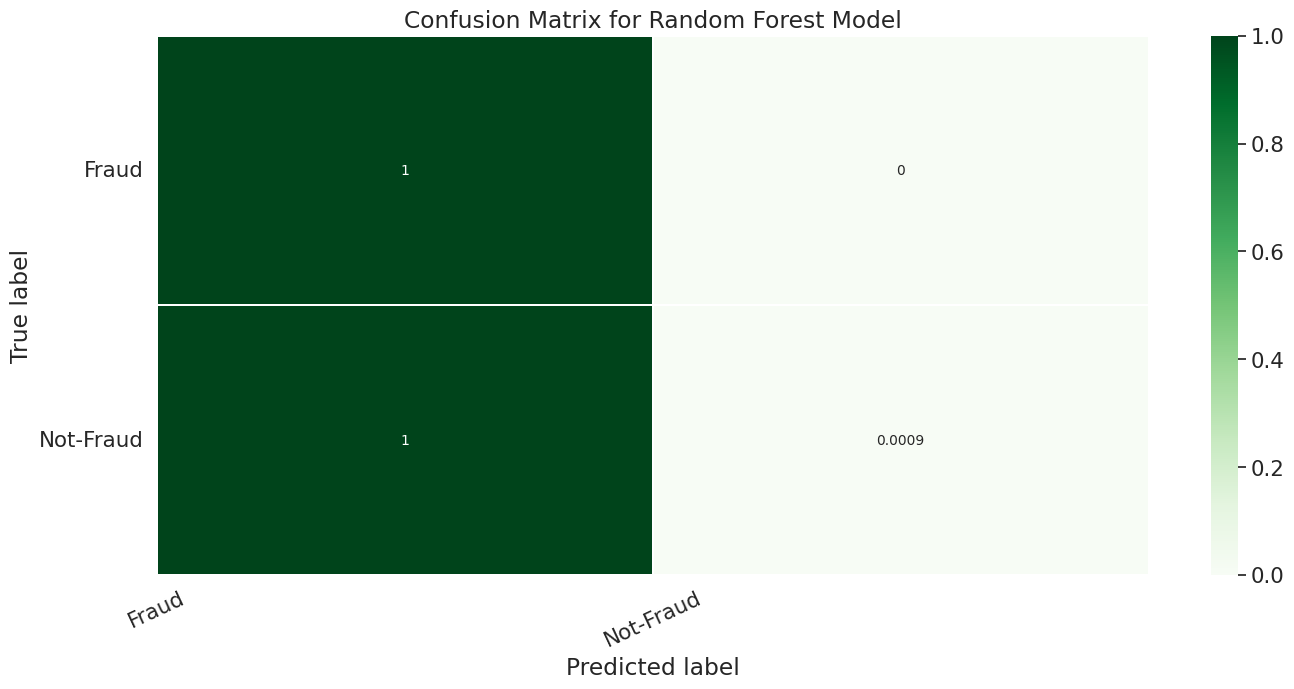

In [21]:
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test, y_pred_test)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['Fraud','Not-Fraud']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

## This is the very skewed dataset so it might hamper some of the result as it can be seen in the above diagram